In [1]:
import xt_fns as xf
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import batman
from astropy.io import ascii
from astropy.table import Table
import astropy
from contextlib import closing
from astropy.time import Time

# The first examples are for combining multiple coronal models of different temperatures. We'll start by using the two temperatures we used in Examples.ipyb

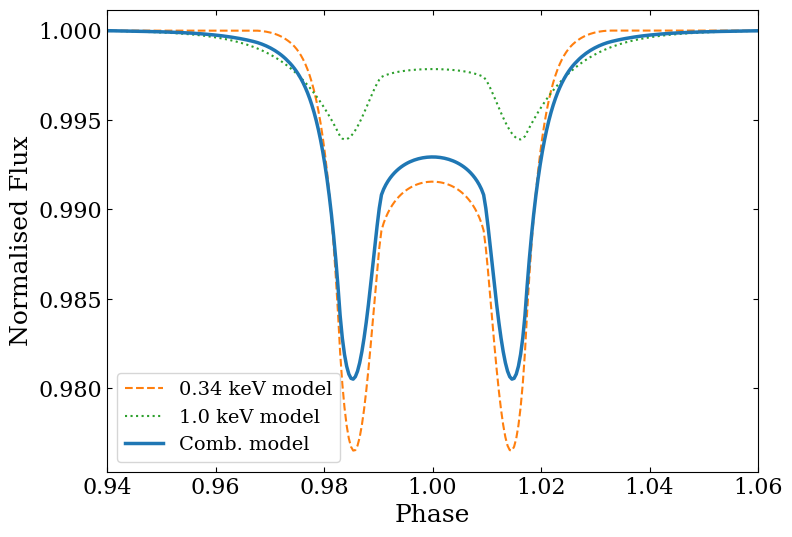

In [2]:
#Stellar parameters
Rs = 0.780 #radius (Rsun)
Ms = 0.823 #mass (Msun)
#temperatures to use (kT of corona in keV)
T1 = 0.34 
T2 = 1.0

#get emission scale height in stellar radii
He1 = xf.HfromT(T1, Rs, Ms)
He2 = xf.HfromT(T2, Rs, Ms)
#get emission scale height in batman coordinates
he1 = xf.hfromH(He1)
he2 = xf.hfromH(He2)

#number of emission scale heights to calculate corona out to
Nscale = 6
#photosphere edge in batman coords
Rx1 = xf.calcRx(he1, Nscale)
Rx2 = xf.calcRx(he2, Nscale)
#integral values
intVals1 = xf.get_intVals(he1, Nscale)
intVals2 = xf.get_intVals(he2, Nscale)


#planetary parameters
RpRs = 0.15641 #Rp/Rs
aRs = 8.863 #a/Rs
inc = 85.710 #inclination
t0 = 1 #phase of transit centre

#set up the object to store the transit parameters
params1 = batman.TransitParams()
params1.t0 = t0               #time of inferior conjunction
params1.per = 1               #orbital period - set to 1 to keep within phase definitions
params1.rp = RpRs * Rx1        #planet radius (in units of stellar radii)
params1.a = aRs * Rx1          #semi-major axis (in units of stellar radii)
params1.inc = inc             #orbital inclination (in degrees)
params1.ecc = 0.              #eccentricity
params1.w = 90.               #longitude of periastron (in degrees)
params1.limb_dark = "custom"  #limb darkening model
params1.u = [0]*6             #limb darkening coefficients
params1.u[0] = intVals1

#set up the object to store the transit parameters
params2 = batman.TransitParams()
params2.t0 = t0               #time of inferior conjunction
params2.per = 1               #orbital period - set to 1 to keep within phase definitions
params2.rp = RpRs * Rx2        #planet radius (in units of stellar radii)
params2.a = aRs * Rx2          #semi-major axis (in units of stellar radii)
params2.inc = inc             #orbital inclination (in degrees)
params2.ecc = 0.              #eccentricity
params2.w = 90.               #longitude of periastron (in degrees)
params2.limb_dark = "custom"  #limb darkening model
params2.u = [0]*6             #limb darkening coefficients
params2.u[0] = intVals2


#initialise a batman model at the calcuation phase times
#Setting up times for model
phaSt, phaFi = 0.9, 1.1 #phases to model
numBins = 500 #number of bins to calculate the light curve at
binPhases = np.linspace(phaSt, phaFi, numBins) #bin centres

#set up batman model
mod1 = batman.TransitModel(params1, binPhases)
mod2 = batman.TransitModel(params2, binPhases)
#get the fluxes
flux1 = mod1.light_curve(params1)
flux2 = mod2.light_curve(params2)

#assume the total emission from the lower temperature model is twice that of the higher temperature model
hFac2 = 0.5

#combine the flux arrays
fluxTot12 = (flux1 + (hFac2 * flux2)) / (1 + hFac2)

plt.rc('font', family='serif')
#plot the model
fig12 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux1, color='C1', ls='--', label='%s keV model' % T1)
plt.plot(binPhases, (flux2*hFac2) + (1-hFac2), color='C2', ls=':', label='%s keV model' % T2)
plt.plot(binPhases, fluxTot12, color='C0', lw=2.5, label='Comb. model')

plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.94,1.06)
plt.legend(loc='lower left', fontsize=14)

plt.savefig('comb_He1-2.pdf', dpi=300)

# Let's compare that to now combining two extremes - a very compact and very spread out corona

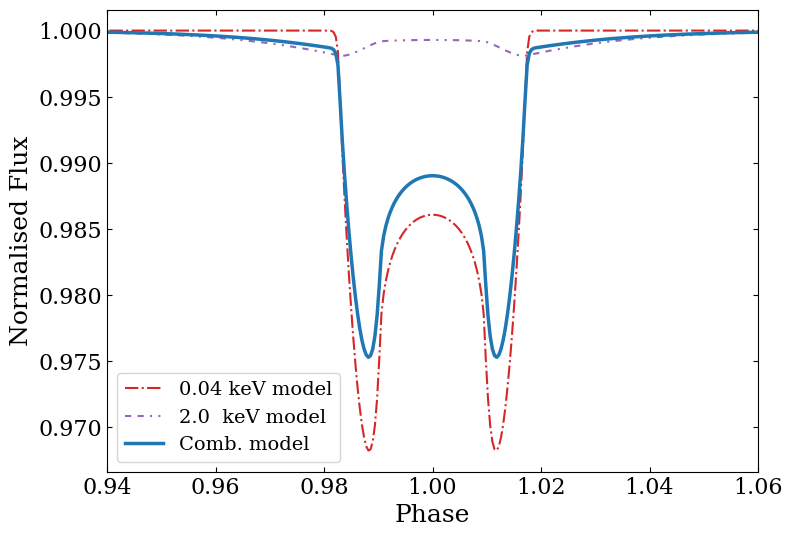

In [3]:
#Stellar parameters
Rs = 0.780 #radius (Rsun)
Ms = 0.823 #mass (Msun)
#temperatures to use (kT of corona in keV)
T3 = 0.04 
T4 = 2.0

#get emission scale height in stellar radii
He3 = xf.HfromT(T3, Rs, Ms)
He4 = xf.HfromT(T4, Rs, Ms)
#get emission scale height in batman coordinates
he3 = xf.hfromH(He3)
he4 = xf.hfromH(He4)

#photosphere edge in batman coords
Rx3 = xf.calcRx(he3, Nscale)
Rx4 = xf.calcRx(he4, Nscale)
#integral values
intVals3 = xf.get_intVals(he3, Nscale)
intVals4 = xf.get_intVals(he4, Nscale)


#set up the object to store the transit parameters
params3 = batman.TransitParams()
params3.t0 = t0               #time of inferior conjunction
params3.per = 1               #orbital period - set to 1 to keep within phase definitions
params3.rp = RpRs * Rx3        #planet radius (in units of stellar radii)
params3.a = aRs * Rx3          #semi-major axis (in units of stellar radii)
params3.inc = inc             #orbital inclination (in degrees)
params3.ecc = 0.              #eccentricity
params3.w = 90.               #longitude of periastron (in degrees)
params3.limb_dark = "custom"  #limb darkening model
params3.u = [0]*6             #limb darkening coefficients
params3.u[0] = intVals3

#set up the object to store the transit parameters
params4 = batman.TransitParams()
params4.t0 = t0               #time of inferior conjunction
params4.per = 1               #orbital period - set to 1 to keep within phase definitions
params4.rp = RpRs * Rx4        #planet radius (in units of stellar radii)
params4.a = aRs * Rx4          #semi-major axis (in units of stellar radii)
params4.inc = inc             #orbital inclination (in degrees)
params4.ecc = 0.              #eccentricity
params4.w = 90.               #longitude of periastron (in degrees)
params4.limb_dark = "custom"  #limb darkening model
params4.u = [0]*6             #limb darkening coefficients
params4.u[0] = intVals4

#set up batman model
mod3 = batman.TransitModel(params3, binPhases)
mod4 = batman.TransitModel(params4, binPhases)
#get the fluxes
flux3 = mod3.light_curve(params3)
flux4 = mod4.light_curve(params4)

#assume the total emission from the lower temperature model is 3x that of the higher temperature model
hFac4 = 1/3.

#combine the flux arrays
fluxTot34 = (flux3 + (hFac4 * flux4)) / (1 + hFac4)

#plot the model
fig34 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux3, color='C3', ls='-.', label='%s keV model' % T3)
plt.plot(binPhases, (flux4*hFac4) + (1-hFac4), color='C4', ls=(0, (3, 3, 3, 3, 1, 3, 1, 3)), label='%s  keV model' % T4)
plt.plot(binPhases, fluxTot34, color='C0', lw=2.5, label='Comb. model')

plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.94,1.06)
plt.legend(loc='lower left', fontsize=14)

plt.savefig('comb_He3-4.pdf', dpi=300)

# Let's combine all four temperature models 

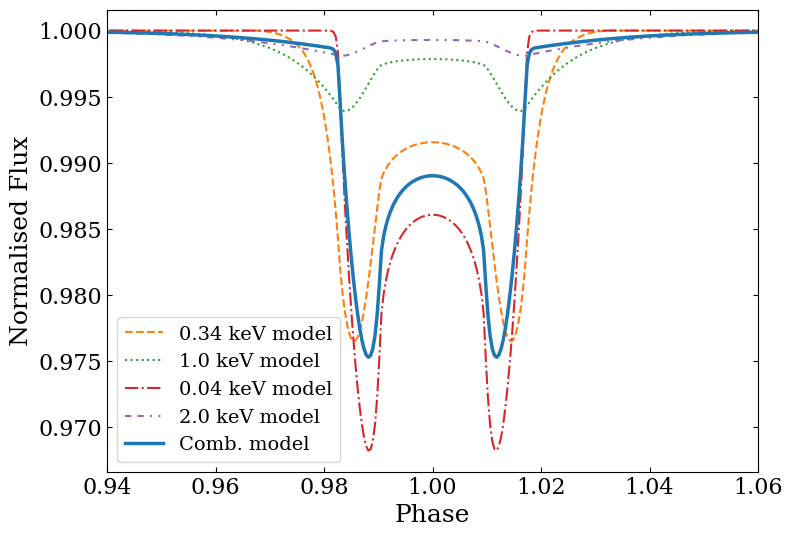

In [4]:
#assume that the total emission of models 1 and 3 are the same
hFac3 = 1.

#combine the flux arrays
fluxTot1234 = (flux1 + (hFac2 * flux2) + (hFac3 * flux3) + (hFac4 * flux4)) / (1 + hFac2 + hFac3 + hFac4)

#plot the model
fig1234 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux1, color='C1', ls='--', label='%s keV model' % T1)
plt.plot(binPhases, (flux2*hFac2) + (1-hFac2), color='C2', ls=':', label='%s keV model' % T2)
plt.plot(binPhases, (flux3*hFac3) + (1-hFac3), color='C3', ls='-.', label='%s keV model' % T3)
plt.plot(binPhases, (flux4*hFac4) + (1-hFac4), color='C4', ls=(0, (3, 3, 3, 3, 1, 3, 1, 3)), label='%s keV model' % T4)
plt.plot(binPhases, fluxTot34, color='C0', lw=2.5, label='Comb. model')

plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.94,1.06)
plt.legend(loc='lower left', fontsize=14)

plt.savefig('comb_He1-2-3-4.pdf', dpi=300)

# We next give examples of using "third light parameters" as described in Section 4.2. We'll do examples of "positive" third light first, using the 0.34 keV model. This is this case where the transit chord is at latitudes that are  dimmer than average.

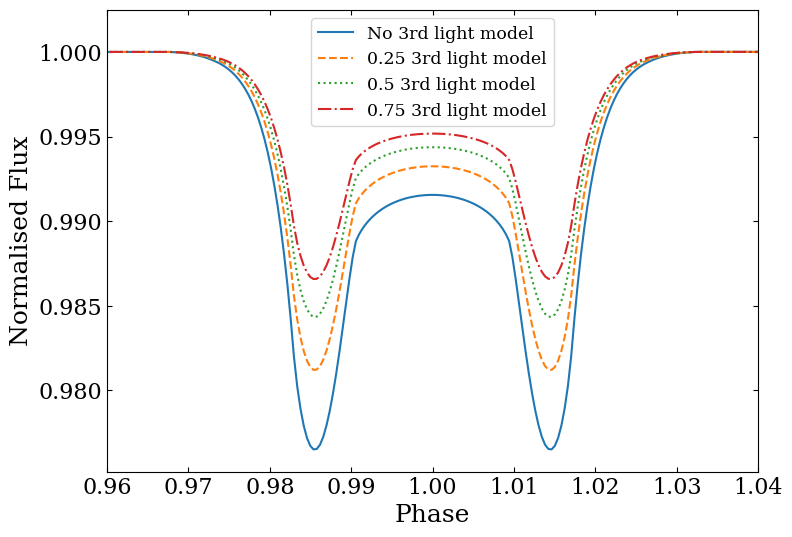

In [5]:
#positive third light values
thirdL1 = 0.25
thirdL2 = 0.50
thirdL3 = 0.75

#calculate the flux in each case
flux1_1 = (flux1 + thirdL1) / (1 + thirdL1)
flux1_2 = (flux1 + thirdL2) / (1 + thirdL2)
flux1_3 = (flux1 + thirdL3) / (1 + thirdL3)

#plot the model
fig3L1 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux1, color='C0', label='No 3rd light model')
plt.plot(binPhases, flux1_1, color='C1', ls='--', label='%s 3rd light model' % thirdL1)
plt.plot(binPhases, flux1_2, color='C2', ls=':', label='%s 3rd light model' % thirdL2)
plt.plot(binPhases, flux1_3, color='C3', ls='-.', label='%s 3rd light model' % thirdL3)


plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.96,1.04)
plt.ylim(0.9752,1.0025)
plt.legend(loc='upper center', fontsize=12.5)

plt.savefig('positive_3L.pdf', dpi=300)

# Let's plot the equivalent for negative third light models. This is the case where the transit chord is across latitudes that are brighter than average

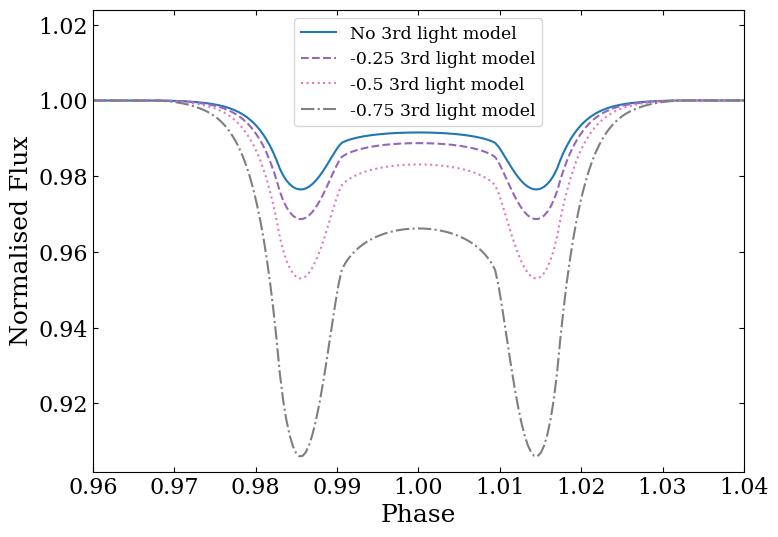

In [6]:
#positive third light values
thirdL4 = -0.25
thirdL5 = -0.50
thirdL6 = -0.75

#calculate the flux in each case
flux1_4 = (flux1 + thirdL4) / (1 + thirdL4)
flux1_5 = (flux1 + thirdL5) / (1 + thirdL5)
flux1_6 = (flux1 + thirdL6) / (1 + thirdL6)

#plot the model
fig3L2 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux1, color='C0', label='No 3rd light model')
plt.plot(binPhases, flux1_4, color='C4', ls='--', label='%s 3rd light model' % thirdL4)
plt.plot(binPhases, flux1_5, color='C6', ls=':', label='%s 3rd light model' % thirdL5)
plt.plot(binPhases, flux1_6, color='C7', ls='-.', label='%s 3rd light model' % thirdL6)


plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.96,1.04)
plt.ylim(0.902,1.024)
plt.legend(loc='upper center', fontsize=12.5)

plt.savefig('negative_3L.pdf', dpi=300)

# For the paper, we also plotted one with 0.25 and -0.25 cases

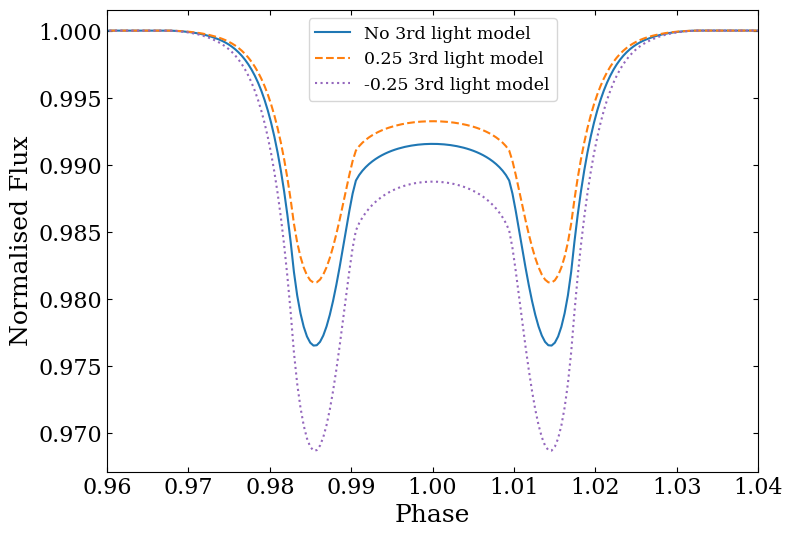

In [7]:
#plot the model
fig3L3 = plt.figure(figsize=(8.4,6.0))

plt.plot(binPhases, flux1, color='C0', label='No 3rd light model')
plt.plot(binPhases, flux1_1, color='C1', ls='--', label='%s 3rd light model' % thirdL1)
plt.plot(binPhases, flux1_4, color='C4', ls=':', label='%s 3rd light model' % thirdL4)


plt.xlabel('Phase',fontsize=18)
plt.ylabel('Normalised Flux',fontsize=18)
plt.tick_params(labelsize=16)
plt.xlim(0.96,1.04)
plt.legend(loc='upper center', fontsize=12.5)

plt.savefig('pos+neg_3L.pdf', dpi=300)

# Combined two panel plot for paper

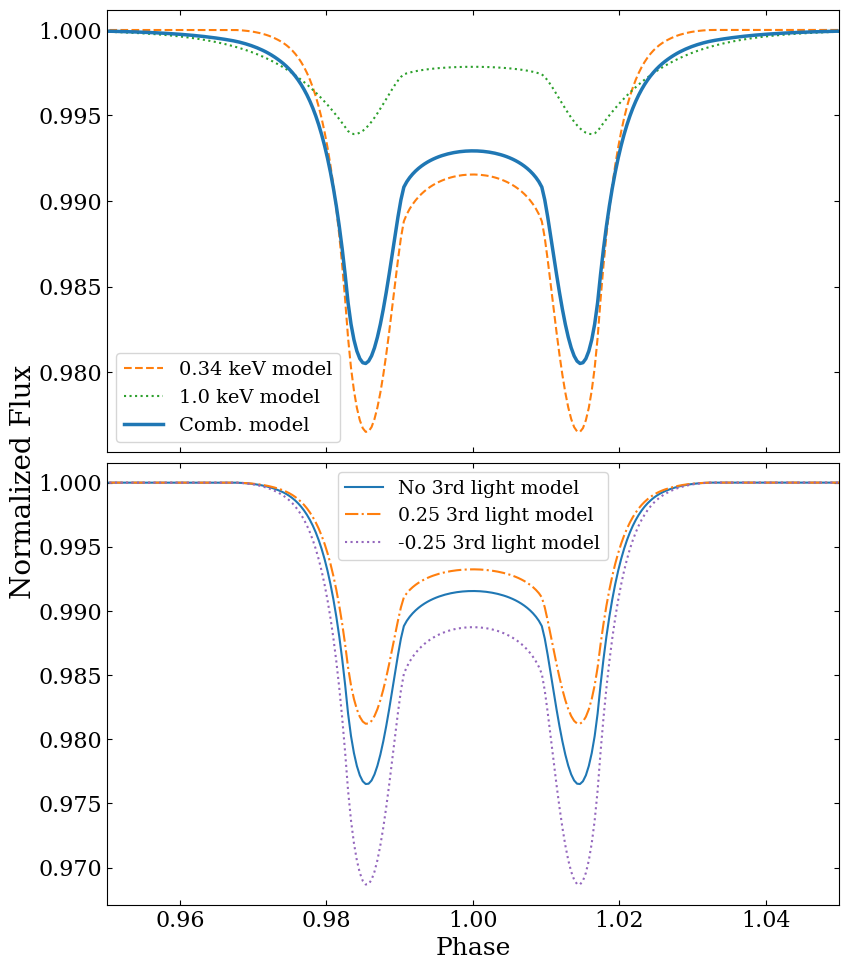

In [17]:
#plot the model
figComb = plt.figure(figsize=(8.4,9.6))

ax1 = figComb.add_subplot(211)

ax1.plot(binPhases, flux1, color='C1', ls='--', label='%s keV model' % T1)
ax1.plot(binPhases, (flux2*hFac2) + (1-hFac2), color='C2', ls=':', label='%s keV model' % T2)
ax1.plot(binPhases, fluxTot12, color='C0', lw=2.5, label='Comb. model')

ax1.set_xticklabels([])
ax1.tick_params(labelsize=16)
ax1.set_xlim(0.95,1.05)
ax1.legend(loc='lower left', fontsize=14)


ax2 = figComb.add_subplot(212)

ax2.plot(binPhases, flux1, color='C0', label='No 3rd light model')
ax2.plot(binPhases, flux1_1, color='C1', ls='-.', label='%s 3rd light model' % thirdL1)
ax2.plot(binPhases, flux1_4, color='C4', ls=':', label='%s 3rd light model' % thirdL4)


ax2.set_xlabel('Phase',fontsize=18)
ax2.tick_params(labelsize=16)
ax2.set_xlim(0.95,1.05)
ax2.legend(loc='upper center', fontsize=13.6)

figComb.text(0.005, 0.5, 'Normalized Flux', va='center', rotation='vertical', fontsize=20)

plt.subplots_adjust(left=0.12, bottom=0.06, right=0.992, top=0.992, hspace=0.024)

plt.savefig('comb_mitigation.pdf', dpi=300)
